# Radiocut - Infovis

En un principio, es necesario importar las librerías para realizar el manejo de datos y las librerías de visualizaciones.

Con el objetivo de visualizar los datos aportados por Radiocut y además aprender a utilizar el ecosistema de librerías de visualizaciones de Python, en este notebook se utilizará:

- [matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [plotly](https://plot.ly/)

Mientras que para manejo de datos se utilizará: 

- [numpy](http://www.numpy.org/)
- [pandas](https://pandas.pydata.org/)

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Matplotlib
import matplotlib
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

from matplotlib import rcParams

DEFAULT_TEXT_COLOR = '#999999'
DEFAULT_LABEL_WEIGHT = 'light'

rcParams['text.color'] = DEFAULT_TEXT_COLOR
rcParams['font.weight'] = DEFAULT_LABEL_WEIGHT
rcParams['axes.linewidth'] = 0.1
rcParams['axes.labelweight'] = DEFAULT_LABEL_WEIGHT
rcParams['axes.labelcolor'] = DEFAULT_TEXT_COLOR

# Seaborn
import seaborn as sns

# Treemap
import squarify

# Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

# ¿Cuáles fueron los cuts más escuchados?

Para comenzar con el análisis, veamos cuáles fueron los cuts más escuchados a lo largo del año 2017. Veamos si hay cuts que destacan considerablemente sobre el resto.

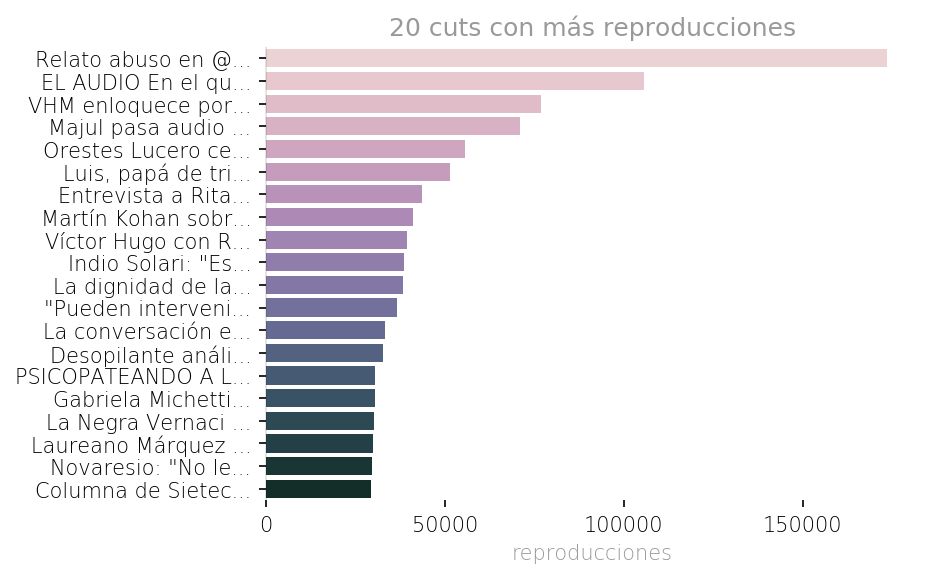

In [17]:
csv = pd.read_csv('queries/radiocut_plays_per_cut.csv')

plt.subplots(dpi=150)
plt.subplots_adjust(right=.85)

df = csv
df['title'] = df['title'].str.slice(0, 17) + '...'

ax = sns.barplot(x='play',
                 y='title',
                 data=df.nlargest(20, 'play'),
                 palette=sns.cubehelix_palette(20, start=-10, rot=.75),
                 antialiased=True)

ax.set_title('20 cuts con más reproducciones')
ax.set_xlabel('reproducciones')
ax.set_ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

Hay un comportamiento no lineal y hay cuts que destacan notablemente, como _Relato abuso en @metromedio_ o _EL AUDIO En el que Cristina Kirchner habla con Parrilli sobre Stiuso y lo trata de "pelotudo"_.

# ¿Cómo se reparten las reproducciones entre cuts?

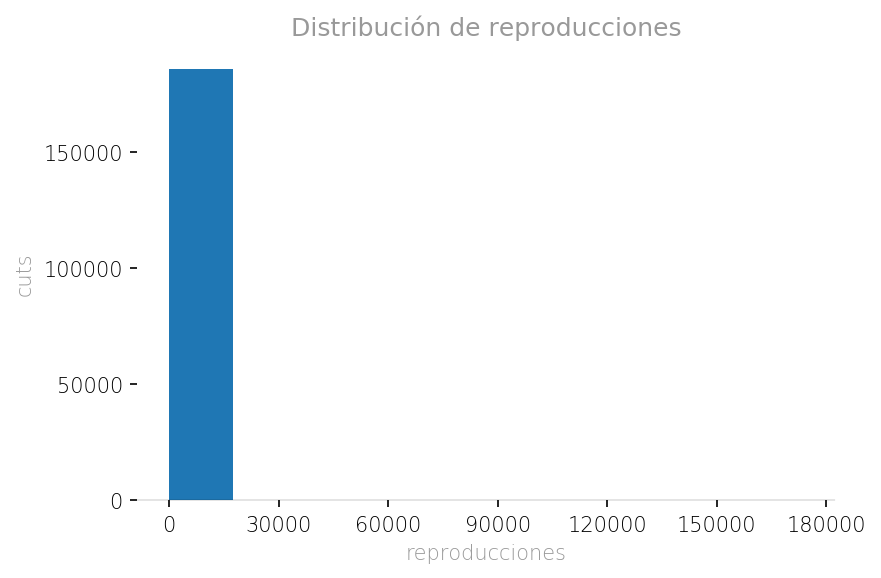

In [3]:
fig, (ax) = plt.subplots(nrows=1, dpi=150)

ax.hist(csv['play'],
        bins=10,
        antialiased=True)

ax.set_title('Distribución de reproducciones')
ax.set_xlabel('reproducciones')
ax.set_ylabel('cuts')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

La distribución es totalmente asimétrica, mostrando que la gran mayoría de los cuts tienen menos de 15000 reproducciones.

Viendo más en detalle ese bin, podemos observar la distribución de los cuts con menos de 300 reproducciones.

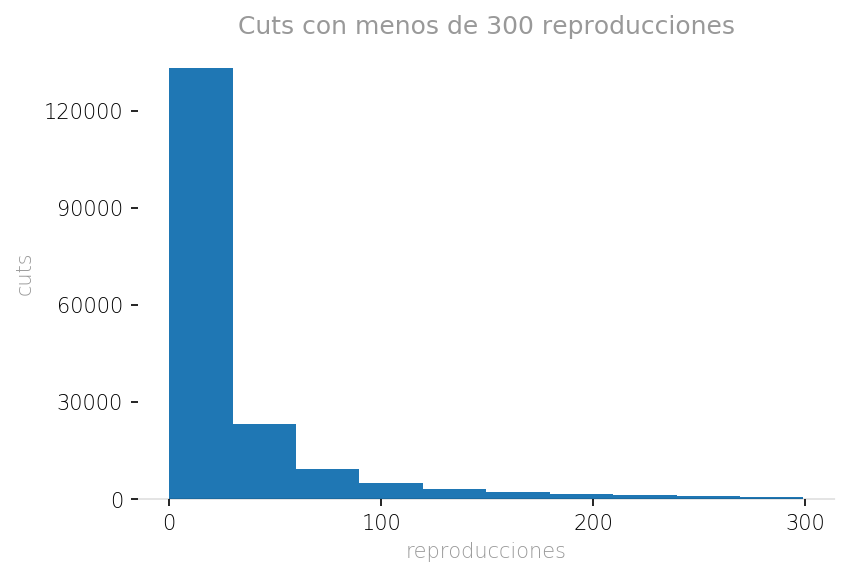

In [18]:
fig, (ax) = plt.subplots(nrows=1, dpi=150)

ax.hist(csv['play'][csv['play'] < 300], bins=10, antialiased=True)

ax.set_title('Cuts con menos de 300 reproducciones')
ax.set_xlabel('reproducciones')
ax.set_ylabel('cuts')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.yaxis.set_major_locator(ticker.MultipleLocator(30000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

Queda claro que la gran mayoría de los cuts no recibe más de 100 reproducciones.

Si dividimos la totalidad de los cuts en tres grupos (menos de 30 reproducciones, entre 30 y 100 reproducciones y más de 100 reproducciones) podemos ver, a continuación, que a pesar de ser la gran mayoría, los cuts poco populares no aportan reproducciones a la plataforma. Si vemos el otro extremo, son pocos los cuts que reciben más de 100 reproducciones pero son los más relevantes dentro de Radiocut.

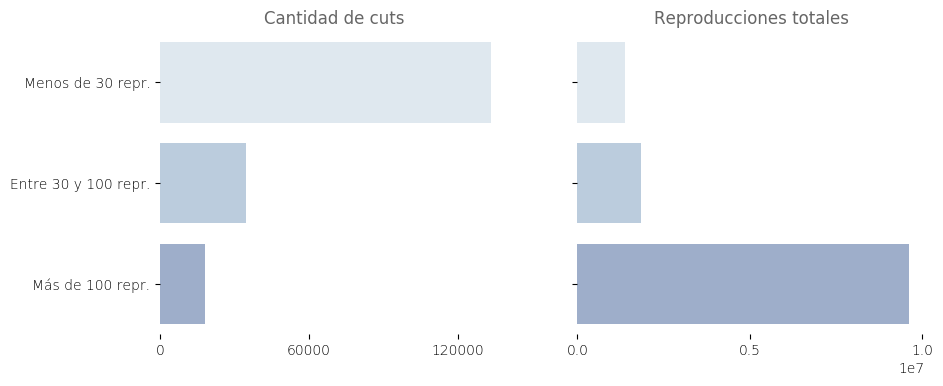

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, dpi=100, sharey=True)

plt.subplots_adjust(right=1.4)

few_plays = csv[csv['play'] < 30]
mid_plays = csv[(csv['play'] >= 30) & (csv['play'] <= 100)]
high_plays = csv[csv['play'] > 100]

df = pd.DataFrame.from_dict([
    ['Menos de 30', few_plays['play'].count()],
    ['Entre 30 y 100', mid_plays['play'].count()],
    ['Más de 100', high_plays['play'].count()]
])

sns.barplot(x=1,
            y=0,
            data=df,
            ax=ax0, 
            palette=sns.color_palette('BuPu'))

ax0.set_title('Cantidad de cuts', color='#666666')
ax0.set_xlabel('')
ax0.set_ylabel('')

ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)

ax0.xaxis.set_major_locator(ticker.MultipleLocator(60000))
ax0.xaxis.set_major_formatter(ticker.ScalarFormatter())

df = pd.DataFrame.from_dict([
    ['Menos de 30 repr.', few_plays['play'].sum()],
    ['Entre 30 y 100 repr.', mid_plays['play'].sum()],
    ['Más de 100 repr.', high_plays['play'].sum()]
])

sns.barplot(x=1,
            y=0,
            data=df,
            ax=ax1,
            palette=sns.color_palette('BuPu'))

ax1.set_title('Reproducciones totales', color='#666666')
ax1.set_xlabel('')
ax1.set_ylabel('')

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

# ¿Cuándo se escuchan más los cuts?

Podemos analizar la cantidad de reproducciones por día de la semana y por hora, graficando la cantidad de reproducciones mediante tonalidades rojizas en un heatmap.

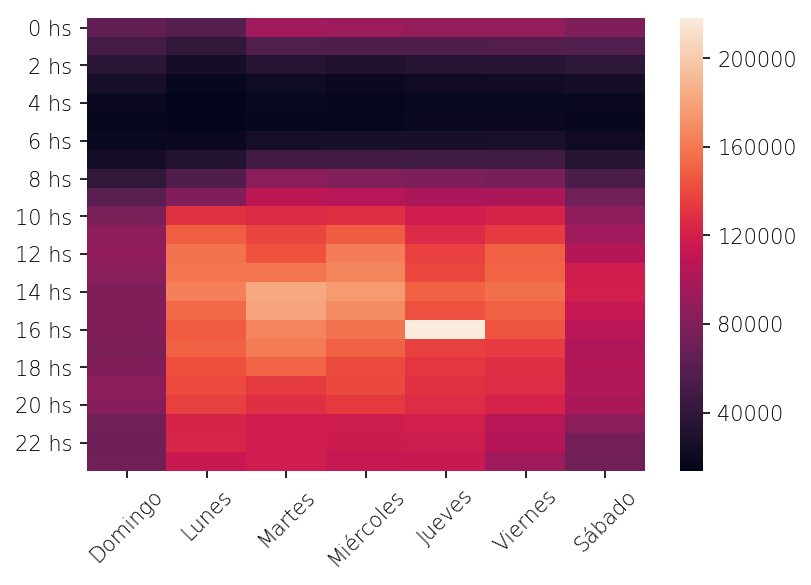

In [13]:
csv = pd.read_csv('queries/radiocut_dow_day.csv', header=None)

time_table = csv.pivot(index=0, columns=1, values=2)
time_table.columns = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
time_table.index = time_table.index.astype('str') + ' hs'

f, (ax) = plt.subplots(dpi=150)

sns.heatmap(time_table, 
            linewidth=0, 
            ax=ax,
            antialiased=False)

plt.xticks(rotation=45)
plt.show()

Los días de semana a partir de las 10 hs se empieza a observar un aumento de actividad en Radiocut, que se mantiene hasta la medianoche.

Hay un punto de particular interés, los jueves a las 16 hs. Veamos la proporción de las reproducciones de los _cuts_ más importantes.

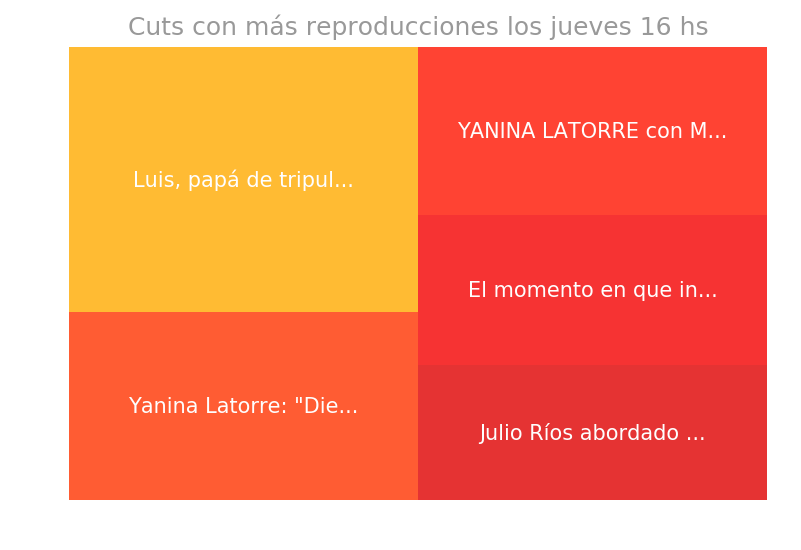

In [19]:
csv0 = pd.read_csv('queries/radiocut_thursday_16hs.csv')
csv1 = pd.read_csv('queries/radiocut_thursday_15hs.csv')

df = csv0

rcParams['text.color'] = '#FEFEFE'
rcParams['font.weight'] = 'normal'

popular_cuts = df[df['plays'] >= 2000]
popular_cuts = popular_cuts.dropna()
popular_cuts.loc[:,'title'] = popular_cuts.loc[:,'title'].str.slice(0, 20) + '...'

fig, (ax) = plt.subplots(ncols=1, dpi=150)

cmap = plt.get_cmap('hot')
mini = popular_cuts['plays'].min()
maxi = popular_cuts['plays'].max()
norm = matplotlib.colors.Normalize(vmin=1, vmax=9000)
colors = [cmap(norm(value)) for value in popular_cuts['plays']]

squarify.plot(sizes=popular_cuts['plays'], label=popular_cuts['title'], alpha=0.8, color=colors, ax=ax)

ax.axis('off')

ax.set_title('Cuts con más reproducciones los jueves 16 hs', color=DEFAULT_TEXT_COLOR)

plt.gca().invert_yaxis()
plt.show()

rcParams['font.weight'] = DEFAULT_LABEL_WEIGHT
rcParams['text.color'] = DEFAULT_TEXT_COLOR

El cut más relevante fue uno relacionado con el submarino ARA San Juan, seguido por dos cuts protagonizados por Yanina Latorre.

# ¿Hay usuarios populares dentro de Radiocut?

Es interesante hacer un análisis de popularidad entre los usuarios que suben cuts a la plataforma.

En una primera instancia, veamos cómo se divide por usuario la cantidad de cuts subidos en comparación a los plays que recibieron sus respectivos cuts.

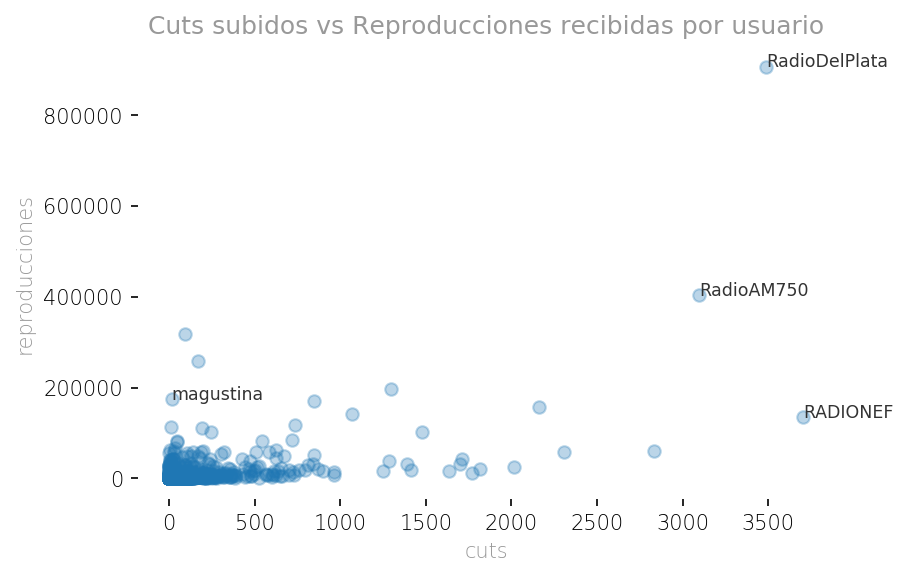

In [15]:
plays_per_user = pd.read_csv('queries/cut_play_sum_per_user.csv', header=None, index_col=0)
count_per_user = pd.read_csv('queries/cut_upload_count_per_user.csv', header=None, index_col=0)

INTERESTING_USERS = ['RadioDelPlata', 'RadioAM750', 'RADIONEF', 'magustina']

df = pd.merge(plays_per_user, count_per_user, left_index=True, right_index=True)

plt.subplots(dpi=150)

ax = sns.regplot(df['1_y'], df['1_x'], fit_reg=False, ci=False, scatter_kws={'alpha': 0.3})
ax.set(title='Cuts subidos vs Reproducciones recibidas por usuario', xlabel='cuts', ylabel='reproducciones')

for index, row in df.loc[INTERESTING_USERS,:].iterrows():
    ax.text(row['1_y'], row['1_x'], index, horizontalalignment='left', size='small',
             color='#333333', weight='normal')

for k, spine in ax.spines.items():
    spine.set_visible(False)
        
plt.plot();

Se destacan una decena de outliers. Los de mayor interés son los usuarios _RadioDelPlata_, _RadioAM750_ y _RADIONEF_, quienes son los que más cuts subieron a la plataforma. Se remarca también el usuario de _magustina_, quien subió el cut con más reproducciones de Radiocut.

Si queremos ver con más detalle si existe alguna relación entre cuts subidos y reproducciones recibidas, podemos graficar el mismo scatter plot con los ejes en unidades logarítmicas.

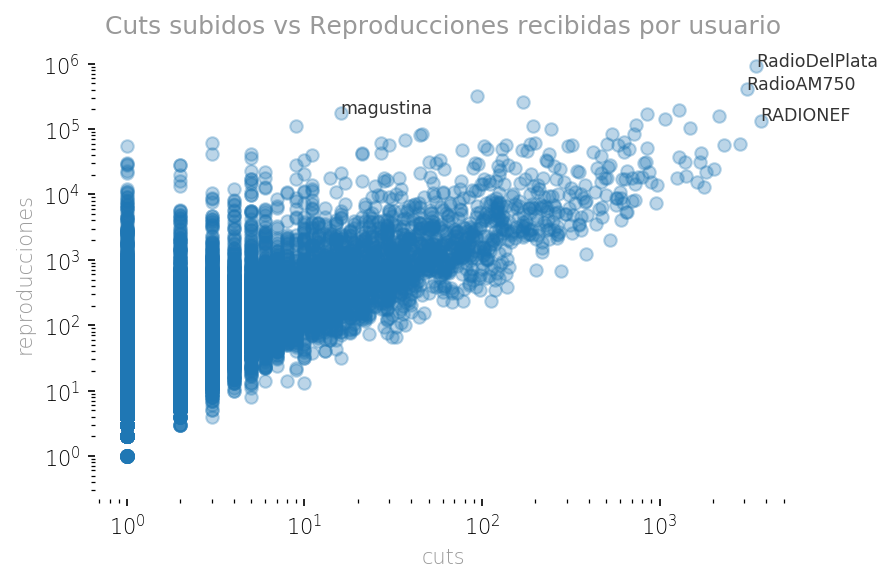

In [9]:
plt.subplots(dpi=150)
ax = sns.regplot(df['1_y'], df['1_x'], fit_reg=False, ci=False, logx=True, scatter_kws={'alpha': 0.3})

ax.set(title='Cuts subidos vs Reproducciones recibidas por usuario', xlabel='cuts', ylabel='reproducciones', xscale="log", yscale="log")

for index, row in df.loc[INTERESTING_USERS,:].iterrows():
    ax.text(row['1_y'], row['1_x'], index, horizontalalignment='left', size='small',
             color='#333333', weight='normal')

for k, spine in ax.spines.items():
        spine.set_visible(False)
        
plt.plot();

Se puede ver una tendencia ascendente bastante marcada entre la cantidad de cuts que sube un usuario y la cantidad de reproducciones que ellos tienen.

# ¿Cómo fueron las reproducciones de los cuts más populares?

Para finalizar, se vio que el audio de Metro y Medio fue el que más reproducciones recibió, junto a otros, veamos cómo se distribuyeron a lo largo del tiempo.

In [10]:
csv = pd.read_csv('queries/radiocut_metromedio_timeline.csv', parse_dates=['time'])
metromedio = go.Scatter(x=csv['time'], 
                        y=csv['plays'],
                        name='Metro y medio')

csv = pd.read_csv('queries/radiocut_cristina_parrili_timeline.csv', parse_dates=['time'])
cristina = go.Scatter(x=csv['time'],
                      y=csv['plays'],
                      name='Cristina y Parrilli')

csv = pd.read_csv('queries/radiocut_vhm_timeline.csv', parse_dates=['time'])
vhm = go.Scatter(x=csv['time'], 
                 y=csv['plays'],
                 name='VHM')

csv = pd.read_csv('queries/radiocut_escuchas_majul_timeline.csv', parse_dates=['time'])
majul = go.Scatter(x=csv['time'], 
                   y=csv['plays'],
                   name='Escuchas Majul')

csv = pd.read_csv('queries/radiocut_censura_trabajadores_timeline.csv', parse_dates=['time'])
cordoba = go.Scatter(x=csv['time'], 
                     y=csv['plays'],
                     name='Censura trabajadores Córdoba')

data = [metromedio, cristina, vhm, majul, cordoba]

layout = dict(
    title='Los 5 cuts más escuchados',
    xaxis=dict(
        range=['2017-01-01', '2018-01-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1 mes',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6 meses',
                     step='month',
                     stepmode='backward'),
                dict(label='todo',
                     step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)

iplot(fig)

Graficando el comportamiento de los cuts más reproducidos a lo largo del tiempo, podemos ver que la popularidad de estos dura no más de 5 días, teniendo una actividad intensa por los primeros días para luego decaer.